<a href="https://colab.research.google.com/github/ChiefGokhlayeh/MV/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Vision - Assignment 1: Basic image operations and camera projection

---

Prof. Dr. Markus Enzweiler, Esslingen University of Applied Sciences

markus.enzweiler@hs-esslingen.de

---

This is the introductory assignment for the "Machine Vision" lecture. 
It covers:
* loading and displaying an image using OpenCV and Matplotlib with Python
* cropping parts of images
* adding visualizations to images
* applying real-world camera projections using the [Cityscapes dataset](https://www.cityscapes-dataset.com/)

To successfully complete this assignment, it is assumed that you already have some experience in Python and numpy. You can either use [Google Colab](https://colab.research.google.com/) for free with a private (dedicated) Google account (recommended) or a local Jupyter installation.

---


## Submission and Deadline

Please submit your solution to this assignment via Moodle until **30.03.2021, 23:59**. 

Please make sure to provide the following in a .zip / .tar.gz file:

* The Jupyter notebook file (.ipynb), e.g. via *File->Download .ipynb* in Colab
* A PDF print-out of the Jupyter notebook, e.g. via *File->Print* in Colab
* Everything else that is needed to run the notebook (images, files, etc.)
* A text file / document containing the names of all participants in your group that contributed to the assignment



## 1) Preparations

Import important libraries (you should probably start with these lines all the time ...)

In [5]:
# OpenCV
import cv2   

# NumPy                    
import numpy as np     

# Matplotlib    
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# make sure we show all plots directly below each cell
%matplotlib inline 

# Some Colab specific packages
if 'google.colab' in str(get_ipython()):
  # image display
  from google.colab.patches import cv2_imshow 

### Some helper functions that we will need

In [6]:
def my_imshow(image, windowTitle="Image"):
  '''
  Displays an image and differentiates between Google Colab and a local Python installation. 

  Args: 
    image: The image to be displayed

  Returns:
    - 
  '''

  if 'google.colab' in str(get_ipython()):
    cv2_imshow(image)
  else:
    cv2.imshow(windowTitle, image)

### In Google Colab only:
Mount the Google Drive associated with your Google account. You will have to click the authorization link and enter the obtained authorization code here in Colab. 

In [7]:
# Mount Google Drive
#if 'google.colab' in str(get_ipython()):
#  from google.colab import drive
#  drive.mount('/content/drive', force_remount=True)

### If you are not using Google Colab:
Just store the image in the same folder as your Jupyter notebook file.

## 2) Some examples for using OpenCV and Matplotlib

Now lets read an image from disk using OpenCV. The image comes from the [Cityscapes dataset](https://www.cityscapes-dataset.com/). We can check its size and data type and display it using OpenCV's imshow() function. 

**Note: You will have to adapt the path to the image according to your folder structure on Google Drive.**

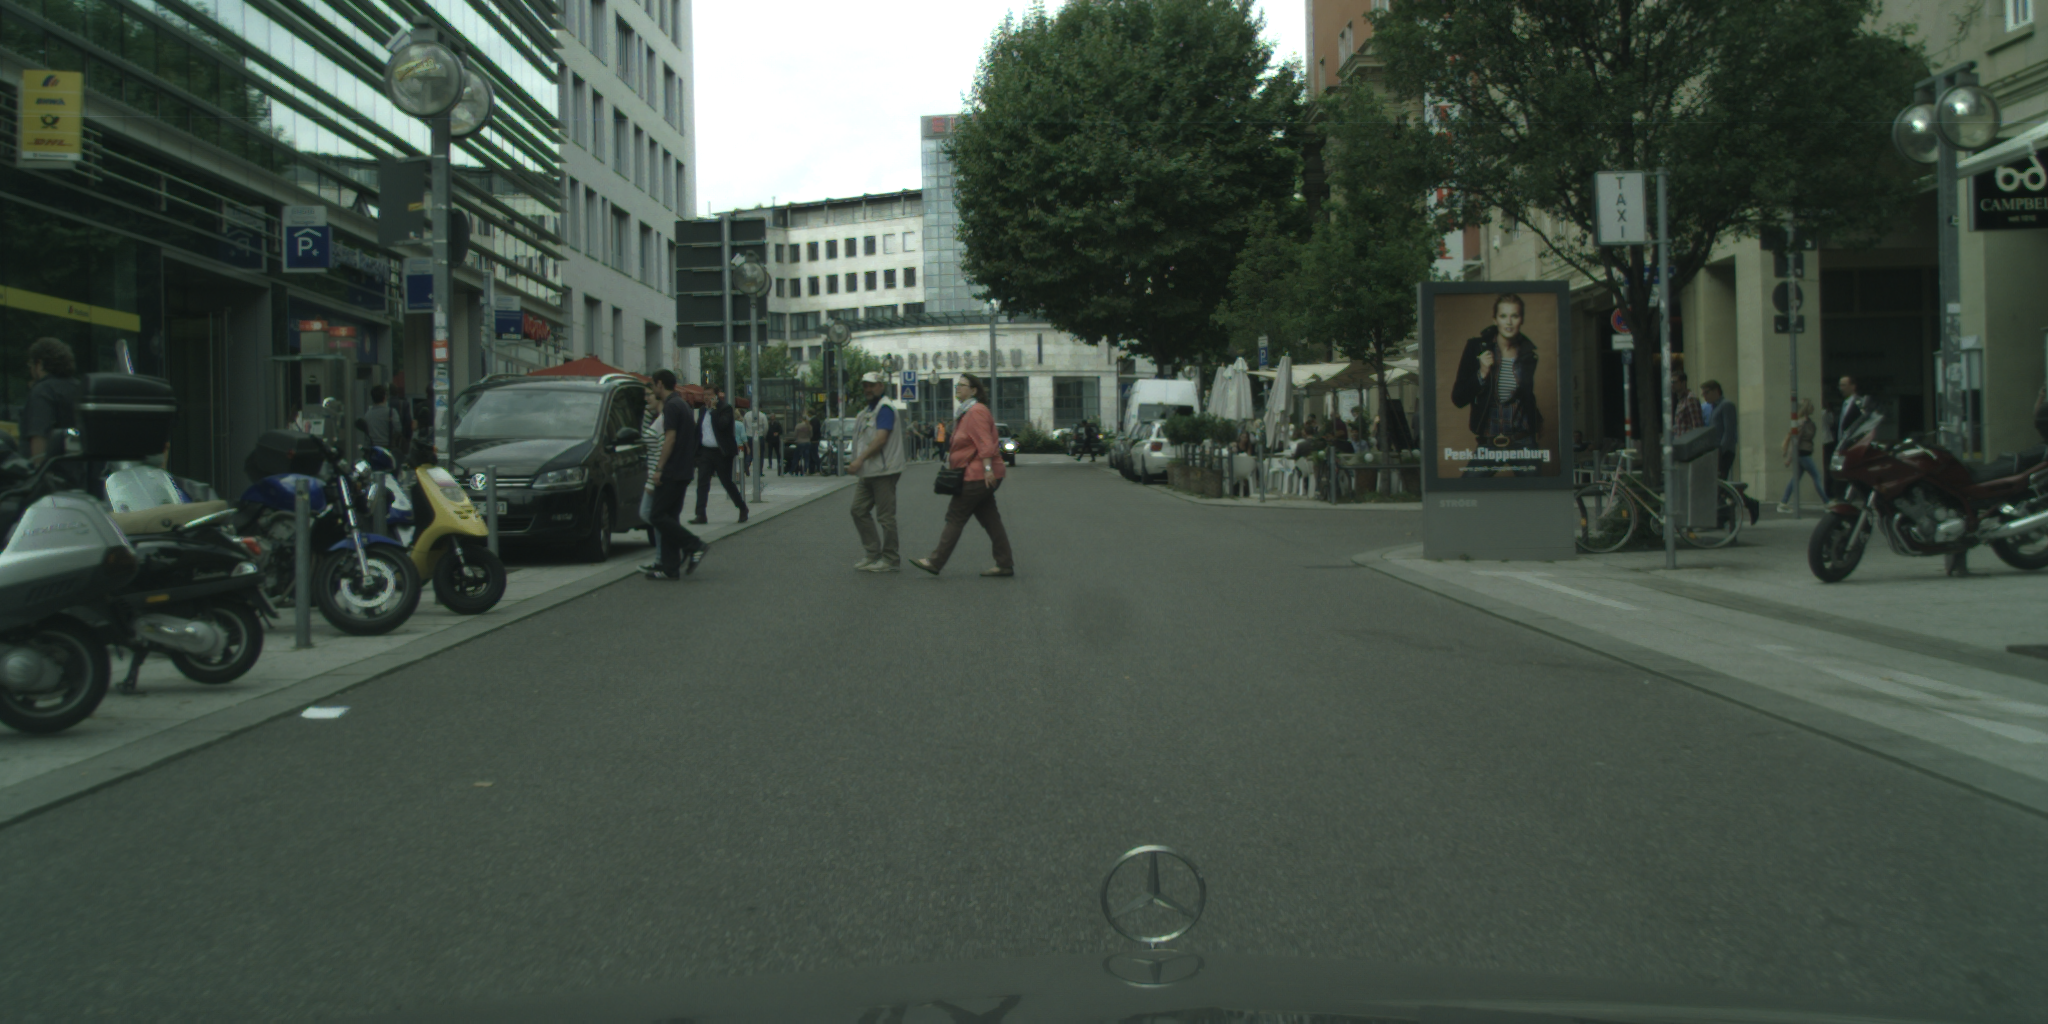

shape:      (1024, 2048, 3)
data type:  uint8


In [8]:
# Path to the image (you will need to change that)
imPath = "/content/stuttgart_000182_000019_leftImg8bit.png"

# Read the image
im = cv2.imread(imPath)

# Display image
my_imshow(im)

# Print shape and data type to console
print('shape:     ', im.shape) 
print('data type: ', im.dtype)

The image ``im`` is a numpy array of size ``height x width x channels``:

In [9]:
im

array([[[ 46,  52,  38],
        [ 46,  53,  38],
        [ 47,  56,  40],
        ...,
        [ 92, 111,  99],
        [ 91, 110,  98],
        [ 92, 111,  99]],

       [[ 46,  52,  37],
        [ 47,  53,  38],
        [ 48,  55,  40],
        ...,
        [ 93, 112,  99],
        [ 92, 111,  98],
        [ 91, 110,  98]],

       [[ 46,  52,  37],
        [ 46,  51,  37],
        [ 48,  54,  39],
        ...,
        [ 92, 111,  98],
        [ 92, 111,  98],
        [ 91, 110,  98]],

       ...,

       [[ 60,  67,  53],
        [ 58,  66,  52],
        [ 61,  68,  53],
        ...,
        [ 60,  67,  53],
        [ 58,  65,  51],
        [ 58,  65,  51]],

       [[ 60,  67,  53],
        [ 58,  66,  52],
        [ 61,  68,  53],
        ...,
        [ 59,  66,  53],
        [ 59,  66,  52],
        [ 59,  65,  52]],

       [[ 60,  67,  53],
        [ 58,  66,  52],
        [ 61,  68,  53],
        ...,
        [ 59,  66,  52],
        [ 59,  65,  52],
        [ 59,  65,  52]]

We can adress a pixel of this image at position ``x=2 (column), y=0 (row)`` as follows. Note the order of x and y! OpenCV and numPy use **row-major ordering**, i.e. every access to a matrix / image is defined as *(row,column)*. 

In [10]:
x, y = 2, 0
im[y, x]

array([47, 56, 40], dtype=uint8)

Do you see this exact value in array two cells above?

If we want to address a part of the image in the first channel, we may use:

In [11]:
x, y, c = 20, 30, 0
im[y-1:y+2, x-1:x+2, c]

array([[34, 34, 33],
       [33, 35, 35],
       [34, 36, 38]], dtype=uint8)

An alternative way to visualize an image is to use Matplotlib instead of OpenCV to display the image. This comes in handy if we need to draw on to of the image:

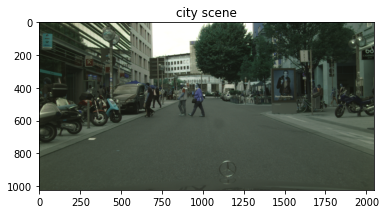

In [12]:
plt.imshow(im)
plt.title('city scene'); 

The colors of the images look wrong now. This is because OpenCV loads color channels in the order B(lue)-G(reen)-R(ed). Matplotlib, however, expects RGB as order of the color channels. Let's convert the image to RGB using OpenCV using the command ``cvtColor``:

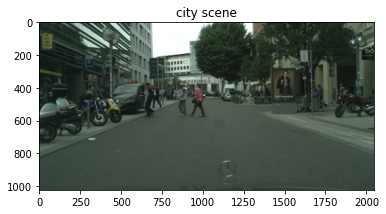

In [13]:
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)
plt.title('city scene');

Much better! Now let's get rid of the axes and make the image a little bit bigger.

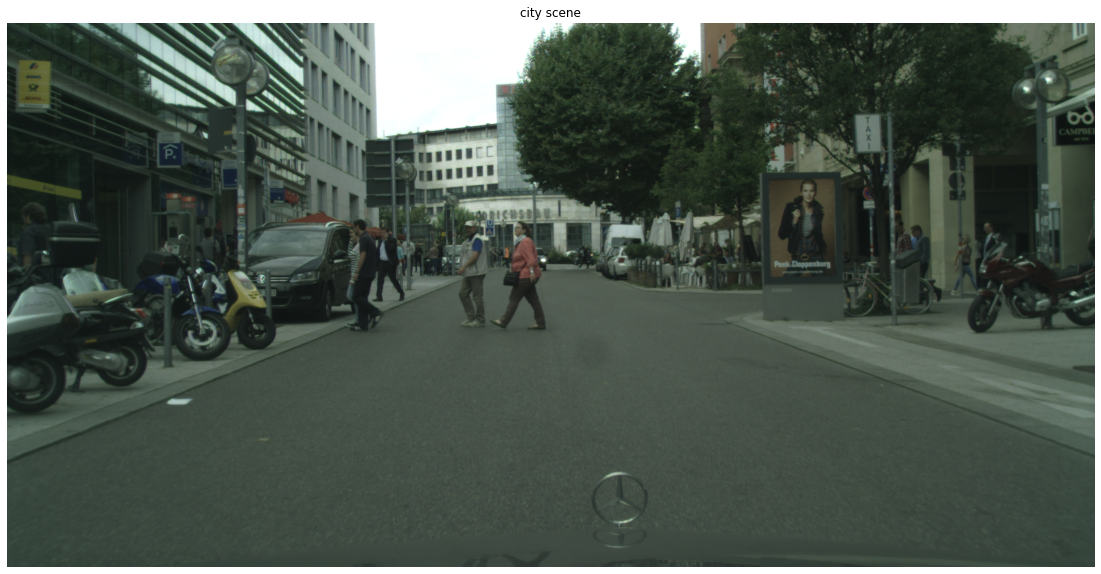

In [14]:
plt.figure(figsize=(20,10))
plt.imshow(im_rgb)
plt.axis('off')
plt.title('city scene');

And finally, we can convert the image to grayscale. This is a common operation in machine vision because some algorithms do not need color information and are faster to compute on grayscale images (as we will see later ...). 

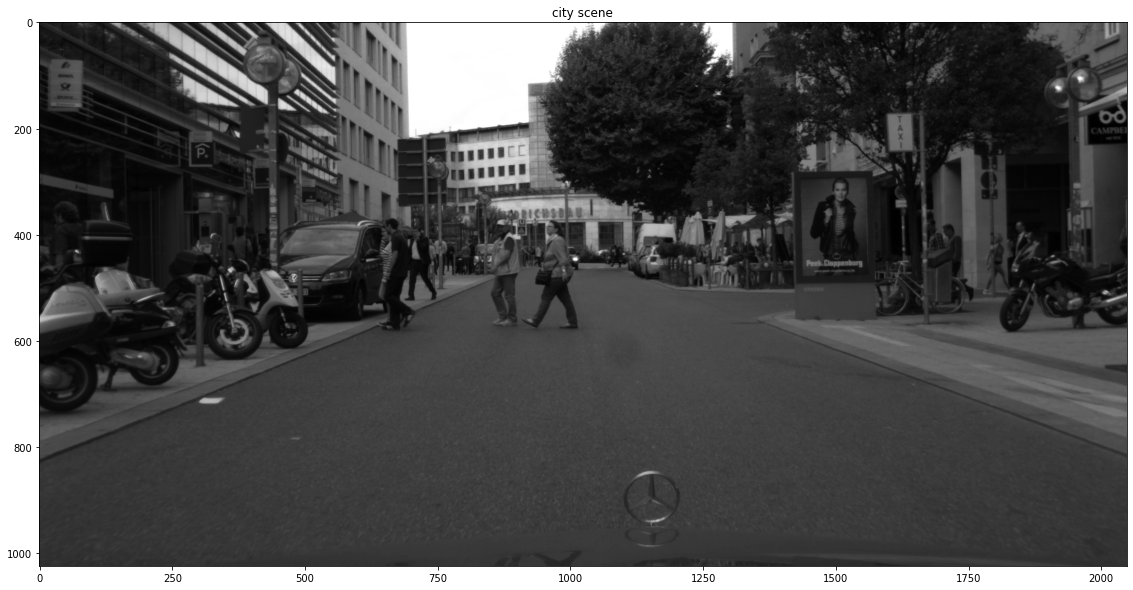

In [15]:
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(20,10))
plt.imshow(im_gray, cmap='gray') 
plt.title('city scene');

Note the colormap ``cmap='gray'`` in the example above. You may also use other colormaps as follows. A colormap is a mapping of the image intensity values (0-255 in this case) to a color palette. 

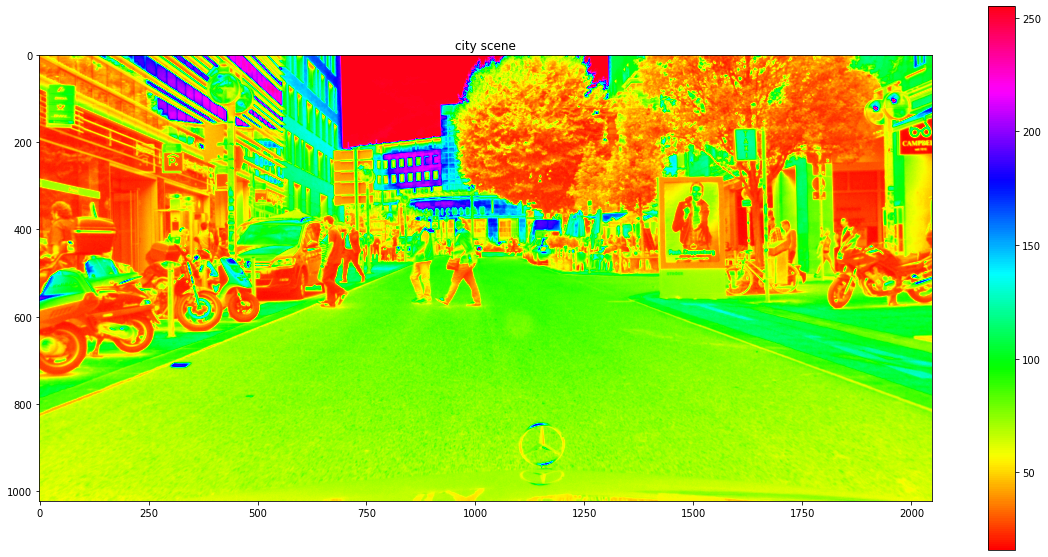

In [16]:
plt.figure(figsize=(20,10))
plt.imshow(im_gray, cmap='hsv') 
plt.title('city scene')
plt.colorbar();

Using Matplotlib, we can also add some lines and markers to the image. For more examples of what Matplotlib can do, please refer to [this page](https://matplotlib.org/stable/tutorials/index.html). Matplotlib typically has an *(x, y)*, i.e. *(column, row)*, interface in its functions.  

**Note**: OpenCV does also offer [drawing functions](https://docs.opencv.org/master/dc/da5/tutorial_py_drawing_functions.html). The difference is, that the OpenCV drawing functions modify the pixel values while drawing whereas Matplotlib creates overlays over the original image and does not change the original image content. 

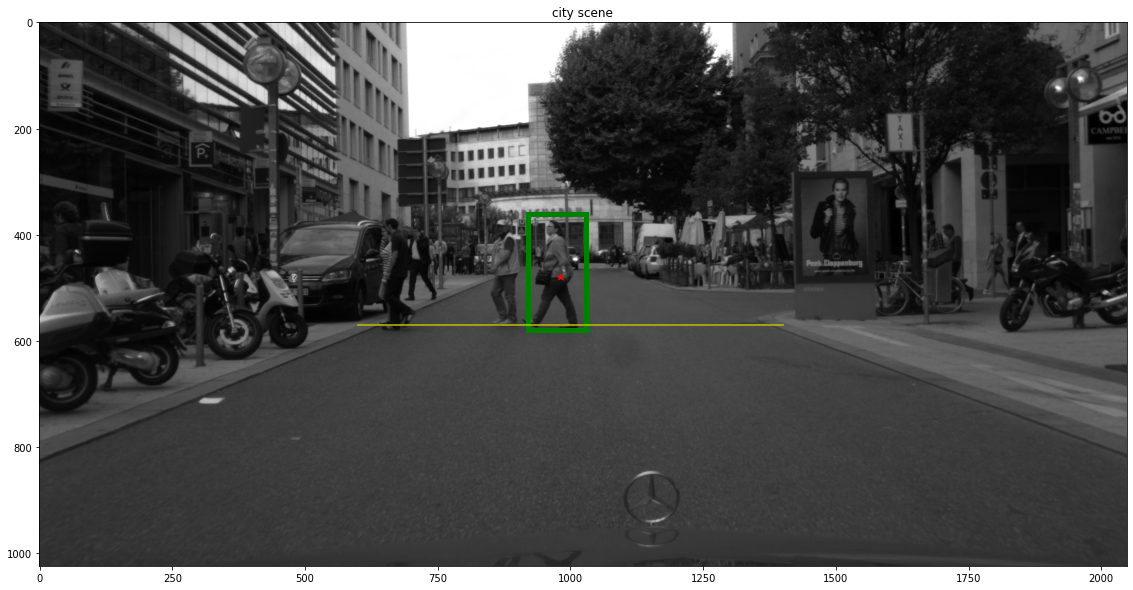

In [17]:
plt.figure(figsize=(20,10))
plt.imshow(im_gray, cmap='gray')
plt.title('city scene')

# a red point
x, y = 980, 480
plt.plot(x, y, 'r*') # note that when plotting with Matplotlib, x and y do not need to be swapped

# a yellow line
x1, y1 = 600, 570
x2, y2 = 1400, 570
plt.plot([x1, x2], [y1, y2], 'y')

# a green rectangle
rect = patches.Rectangle((920, 360), 110, 220, edgecolor='g', facecolor="none", linewidth=5)
plt.gca().add_patch(rect); # note the the semicolon here suppresses output of add_patch()

## 3) Exercises

## Exercise 1 (5 points) - Analyze intensity in distinct image rows

1. Extract image rows 100 and 800 from the graylevel representation of the image above into two new images of size 2048 x 1 and display them.
2. Use Matplotlib's `plot` function to plot the intensity values in both image rows. Verify that the intensity plot makes sense by comparing the positions of the peaks with the actual image. 

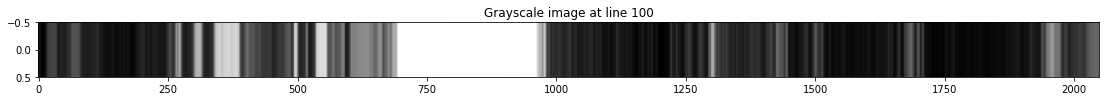

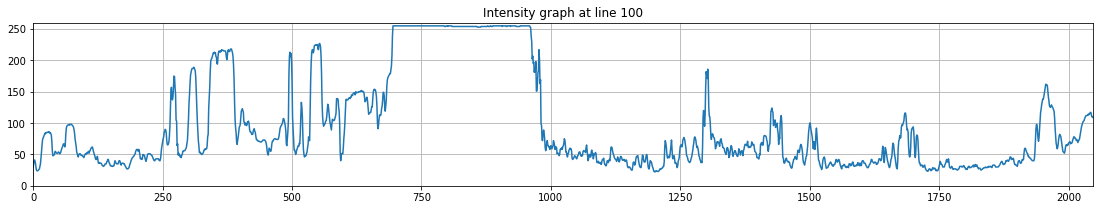

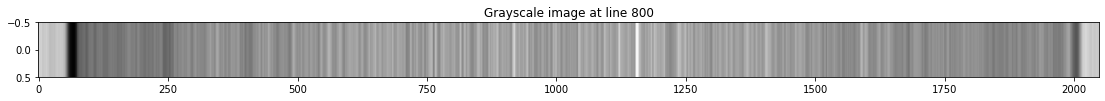

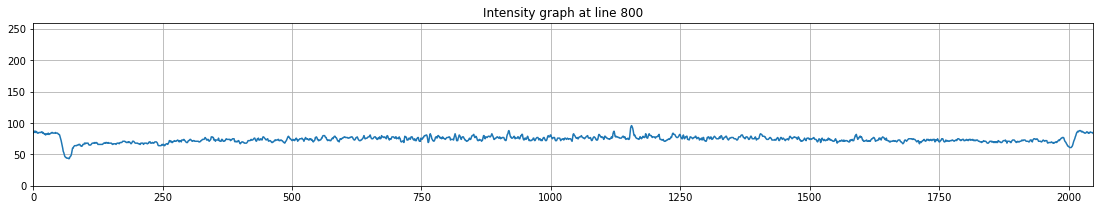

In [58]:
lines = (100, 800)
for line in lines:
  im_line = [im_gray[line]]
  plt.figure(figsize=(20, 1))
  plt.imshow(im_line, cmap='gray', aspect='auto')
  plt.title(f"Grayscale image at line {line}")

  plt.figure(figsize=(20, 3))
  plt.axis((0, len(im_line[0]), 0, 260))
  plt.grid()
  plt.plot(im_line[0])
  plt.title(f"Intensity graph at line {line}")


## Exercise 2 (15 points) - Camera projection examples with real-world data

### Introduction

The [Cityscapes Dataset](https://www.cityscapes-dataset.com/) is one of the most famous benchmark datasets for automated driving and vision-based scene understanding. Browse through the [Cityscapes webpage](https://www.cityscapes-dataset.com/) to get an overview of the overall dataset. 

One of the distinctive features of Cityscapes is that it has been recorded from a moving vehicle in urban traffic. All sensors on the vehicle have been carefully calibrated. Cityscapes defines three different coordinate systems (as we discussed in the lecture): image coordinates, camera coordinates (origin is in the camera behind the windshield), vehicle coordinates (origin is on the ground below the center of the vehicle's rear axis). See the file `csCalibration.pdf` for details. Transformations between different coordinate systems are governed by a set of extrinsic and intrinsic camera parameters which are available for every image in the Cityscapes dataset as a JSON file, see `stuttgart_000182_000019_camera.json`:
```{
    "extrinsic": {
        "baseline": 0.209313,
        "pitch": 0.038, 
        "roll": 0.0, 
        "x": 1.7, 
        "y": 0.1, 
        "yaw": -0.0195, 
        "z": 1.22
    }, 
    "intrinsic": {
        "fx": 2262.52, 
        "fy": 2265.3017905988554, 
        "u0": 1096.98, 
        "v0": 513.137
    }
}
```
Note, that Cityscapes uses a slightly different formulation of intrinsic parameters where the focal length is given in pixels, i.e. $f_x = s_x * f$ and $f_y = s_y * f$. Additionally, a `baseline` parameter is given in the extrinsics that describes the distance between two cameras of a stereo camera setup which has been used for Cityscapes. We can ignore that parameter here as we are only working with a single (left) image. 

<img src='https://drive.google.com/uc?id=1MlAu_WeWx6kStgpQ4DDg189QWkrxQppc'>



### Provided functions

To help with projection between different coordinates the following functions are provided. The implementation exactly follows `csCalibration.pdf`. 

In [19]:
# Some more imports
import json                         
import math                          

def readIntrinsicsAndExtrinsics(camParamFile):
  '''
  Reads Cityscapes camera file containing intrinsic and extrinsic camera parameters

  Args: 
    camParamFile: The camera file to be read

  Returns:
    Camera parameters. 
  '''

  with open(camParamFile) as jsonFile:
    camParams = json.load(jsonFile)
    return camParams



def buildProjectionMatrices(camParams):
  '''
  Builds and returns "R" (rotation), "t" (translation), "C"  as described in csCalibration.pdf

  Parameters: 
    camParams: Input camera parameters

  Returns: 
    "R", "t", "C" as described in csCalibration.pdf
  '''

  # build R and t
  x     = camParams['extrinsic']['x']
  y     = camParams['extrinsic']['y']
  z     = camParams['extrinsic']['z']
  yaw   = camParams['extrinsic']['yaw']
  pitch = camParams['extrinsic']['pitch']
  roll  = camParams['extrinsic']['roll']

  cos_y = math.cos(yaw)
  sin_y = math.sin(yaw)
  cos_p = math.cos(pitch)
  sin_p = math.sin(pitch)
  cos_r = math.cos(roll)
  sin_r = math.sin(roll)

  # rotation
  R_cv = np.matrix([[cos_y*cos_p, cos_y*sin_p*sin_r - sin_y*cos_r, cos_y*sin_p*cos_r + sin_y*sin_r], \
                    [sin_y*cos_p, sin_y*sin_p*sin_r + cos_y*cos_r, sin_y*sin_p*cos_r - cos_y*sin_r], \
                    [-sin_p,      cos_p*sin_r,                     cos_p*cos_r                    ]])
  # translation
  t_cv = np.matrix([x,y,z]).T

  R = R_cv.T
  t = -R * t_cv


  # build C
  fx     = camParams['intrinsic']['fx']
  fy     = camParams['intrinsic']['fy']
  u0     = camParams['intrinsic']['u0']
  v0     = camParams['intrinsic']['v0']

  K = np.matrix([[fx, 0,  u0], \
                 [0,  fy, v0], \
                 [0,  0,  1 ]])

  C = K * np.matrix([[0, -1,  0], \
                     [0,  0, -1], \
                     [1,  0,  0]])

  return R,t,C



def vehicleToCam(pointInVehicleCoordinates, R, t):
  '''
  Project a point from 3D vehicle coordinates (X_v, Y_v, Z_v) to 3D camera coordinates (X_c, Y_c, Z_c) using extrinsics. 
  Rotation and translation!

  Parameters: 
    pointInVehicleCoordinates: Input point in vehicle coordinates (NumPy column vector)

  Returns: 
    Point in camera coordinates (NumPy column vector)
  '''

  # translation followed by a rotation
  return R * (pointInVehicleCoordinates + t)



def camToImage(pointInCameraCoordinates, C):
  '''
  Project a point from 3D camera coordinates (X_c, Y_c, Z_c) to 2D image coordinates (x, y) using intrinsics. 

  Parameters: 
    pointInCameraCoordinates: Input point in camera coordinates (NumPy column vector)

  Returns: 
    Point in image coordinates (NumPy column vector)
  '''

  # translation followed by a rotation
  result = C * pointInCameraCoordinates
  
  # divide by the third component ( see homogeneous coordinates )
  u = int(result[0] / result[2])
  v = int(result[1] / result[2])
  return np.array([u,v]).T



def vehicleToImage(pointInVehicleCoordinates, R, t, C):
  '''
  Project a point from 3D vehicle coordinates (X_v, Y_v, Z_v) to 2D image coordinates (x, y) using extrinsics 
  and intrinsics.

  Parameters:
    pointInVehicleCoordinates: Input point in vehicle coordinates (NumPy column vector)

  Returns:
    Point in image coordinates (NumPy column vector)
  '''
  # first vehicle -> cam, then cam -> image
  return camToImage(vehicleToCam(pointInVehicleCoordinates, R, t), C)



# New Section

### Exercise 2.1 (5 points)

The image row where the ground plane is at infinite distance is called the *horizon line*. **Compute and visualize** the horizon line in the provided image `stuttgart_000182_000019_leftImg8bit.png` by projecting the point $(100000, 0, 0)^T$ (in meters, vehicle coordinates, $x$-axis pointing in driving direction, see `csCalibration.pdf`) into the image. Intrinsic and extrinsic camera parameters are given in `stuttgart_000182_000019_camera.json`. 

**Please use the provided helper functions** `readIntrinsicsAndExtrinsics()`, `buildProjectionMatrices()` and `vehicleToImage()`. 

horizon point in image coordinates: [1052  427]


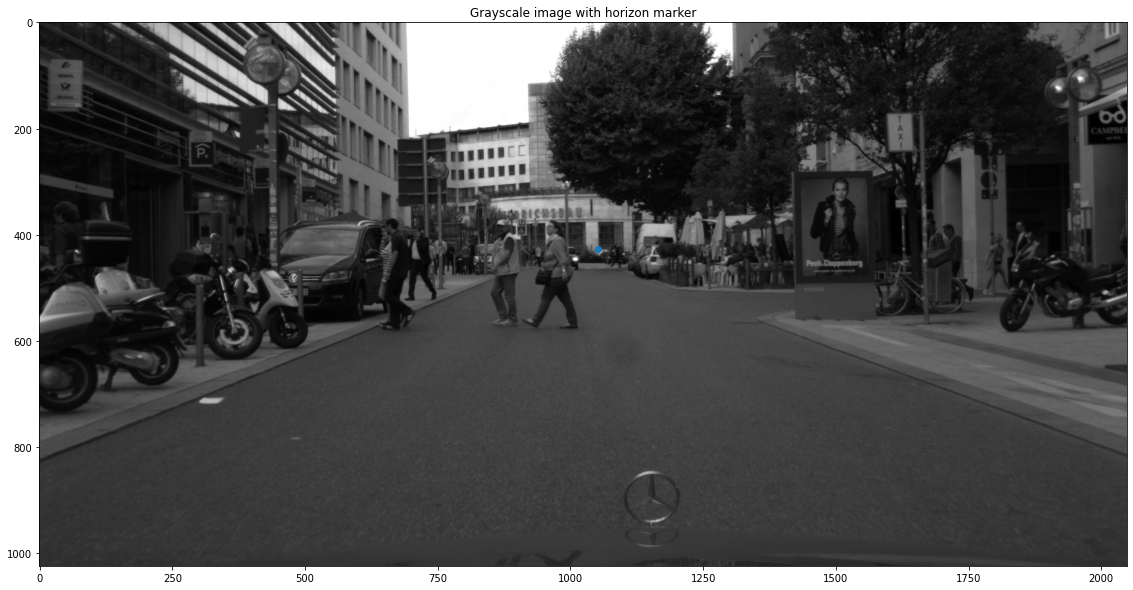

In [42]:
cam_param_file = '/content/stuttgart_000182_000019_camera.json'
cam_param = readIntrinsicsAndExtrinsics(cam_param_file)

R, t, C = buildProjectionMatrices(cam_param)

horizon_world = np.array([[100_000, 0, 0]]).T

horizon_image = vehicleToImage(horizon_world, R, t, C)
print(f"horizon point in image coordinates: {horizon_image}")

plt.figure(figsize=(20, 10))
plt.imshow(im_gray, cmap='gray')
plt.title("Grayscale image with horizon marker")
plt.scatter(horizon_image[0], horizon_image[1]);

### Exercise 2.2 (5 points)

**Compute and visualize** lines on the ground that have a distance of $10m, 20m, \dots, 50m$ from the origin of the vehicle coordinate system. 

**Please use the provided helper functions** `readIntrinsicsAndExtrinsics()`, `buildProjectionMatrices()` and `vehicleToImage()`. 

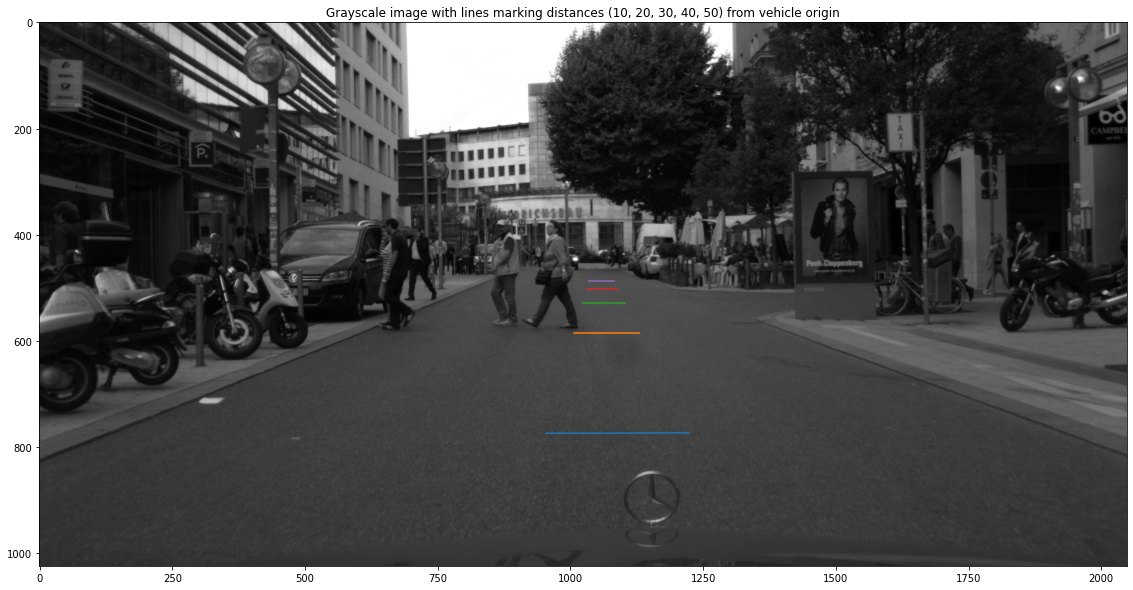

In [21]:
distances = range(10, 51, 10) # grid lines in 10m separation

plt.figure(figsize=(20, 10))
plt.imshow(im_gray, cmap='gray')
plt.title(f"Grayscale image with lines marking distances {tuple(distances)} from vehicle origin")

for distance in distances:
  grid_l_world = np.array([[distance, 0.5, 0]]).T # end of line 0.5m left from center
  grid_r_world = np.array([[distance, -0.5, 0]]).T # end of line 0.5m right from center

  grid_l_image = vehicleToImage(grid_l_world, R, t, C)
  grid_r_image = vehicleToImage(grid_r_world, R, t, C)
  x = np.hstack((grid_l_image[0], grid_r_image[0]))
  y = np.hstack((grid_l_image[1], grid_r_image[1]))

  plt.plot(x, y)

### Exercise 2.3 (5 points)

The woman in the red jacket seems to be approximately $21m$ away from and $0.85m$ to the left of the origin of the vehicle coordinate system ($x$-axis pointing in driving direction, $y$-axis pointing to the left, see `csCalibration.pdf`). Let's assume she has a body height of $1.75m$. **Generate and visualize** a 2D bounding box in the image (2:1 aspect ratio) at that position that includes this assumption of pedestrians standing on the ground and being $1.75m$ tall, in our example. This box should fit the woman in the red jacket quite well and can be used to constrain a pedestrian detector.  

**Please use the provided helper functions** `readIntrinsicsAndExtrinsics()`, `buildProjectionMatrices()` and `vehicleToImage()`. 

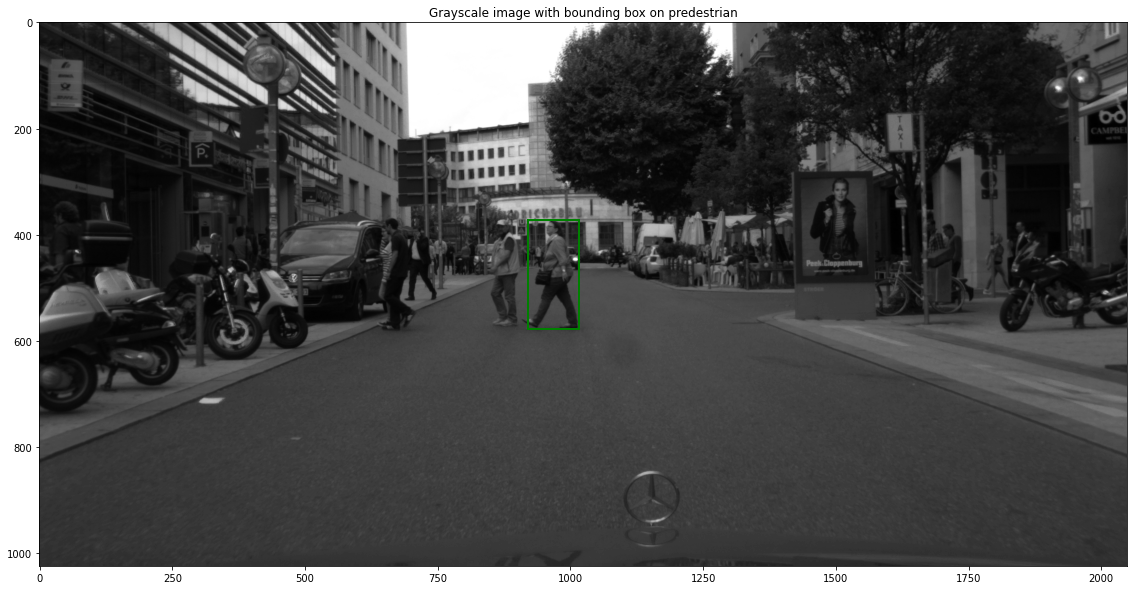

In [57]:
plt.figure(figsize=(20, 10))
plt.imshow(im_gray, cmap='gray')
plt.title(f"Grayscale image with bounding box on predestrian")

pedestrian_base_world = np.array([[21.0, 0.85, 0]]).T
pedestrian_dimensions_world = np.array([[0.0, 0.0, 1.75]]).T
pedestrian_head_world = pedestrian_base_world + pedestrian_dimensions_world

pedestrian_base_image = vehicleToImage(pedestrian_base_world, R, t, C)
pedestrian_head_image = vehicleToImage(pedestrian_head_world, R, t, C)

pedestrian_width_image = abs(pedestrian_head_image[0] - pedestrian_base_image[1]) / 4
pedestrian_height_image = abs(pedestrian_head_image[1] - pedestrian_base_image[1])

rect = patches.Rectangle(
    (pedestrian_head_image[0] - pedestrian_width_image / 2, pedestrian_head_image[1]),
    pedestrian_width_image,
    pedestrian_height_image,
    edgecolor='g',
    facecolor="none",
    linewidth=2)
plt.gca().add_patch(rect);
